# Рубежный контроль №2
## Сухова М.А. ИУ5-65Б Вариант №17

#### Применяемые методы: 
    Метод опорных векторов 	
    Градиентный бустинг

## Задание

Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных).

Для построения моделей используйте методы: Метод опорных векторов, Градиентный бустинг. 

Оцените качество моделей на основе подходящих метрик качества (двух).

    Какие метрики качества Вы использовали и почему? 

    Какие выводы Вы можете сделать о качестве построенных моделей? 

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Реализация

### Импорт библиотек

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

### Смотрим на датасет

In [39]:
df = pd.read_csv('./FIFA 2018 Statistics.csv')

In [40]:
df.shape

(128, 27)

In [41]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [42]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [43]:
print("Размер набора:")
print(f'В датасете {df.shape[0]} строк и {df.shape[1]} колонок.')

Размер набора:
В датасете 128 строк и 27 колонок.


In [44]:
df.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [45]:
df.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [46]:
df = df.drop(['Own goals', 'Own goal Time', '1st Goal'], axis=1)

In [47]:
df.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
Round                     0
PSO                       0
Goals in PSO              0
dtype: int64

## Приступаем к выбору задачи и ее решению

Столбец "Man of the Match" выберем как классификатор. Для этого заменим переменные

In [48]:
cleanup_nums = {"Man of the Match":     {"Yes": 1, "No": 0}}

df = df.replace(cleanup_nums)

In [49]:
df["Man of the Match"].value_counts()

1    64
0    64
Name: Man of the Match, dtype: int64

In [53]:
int_df = df.select_dtypes(include=['int64', 'float64']).copy()

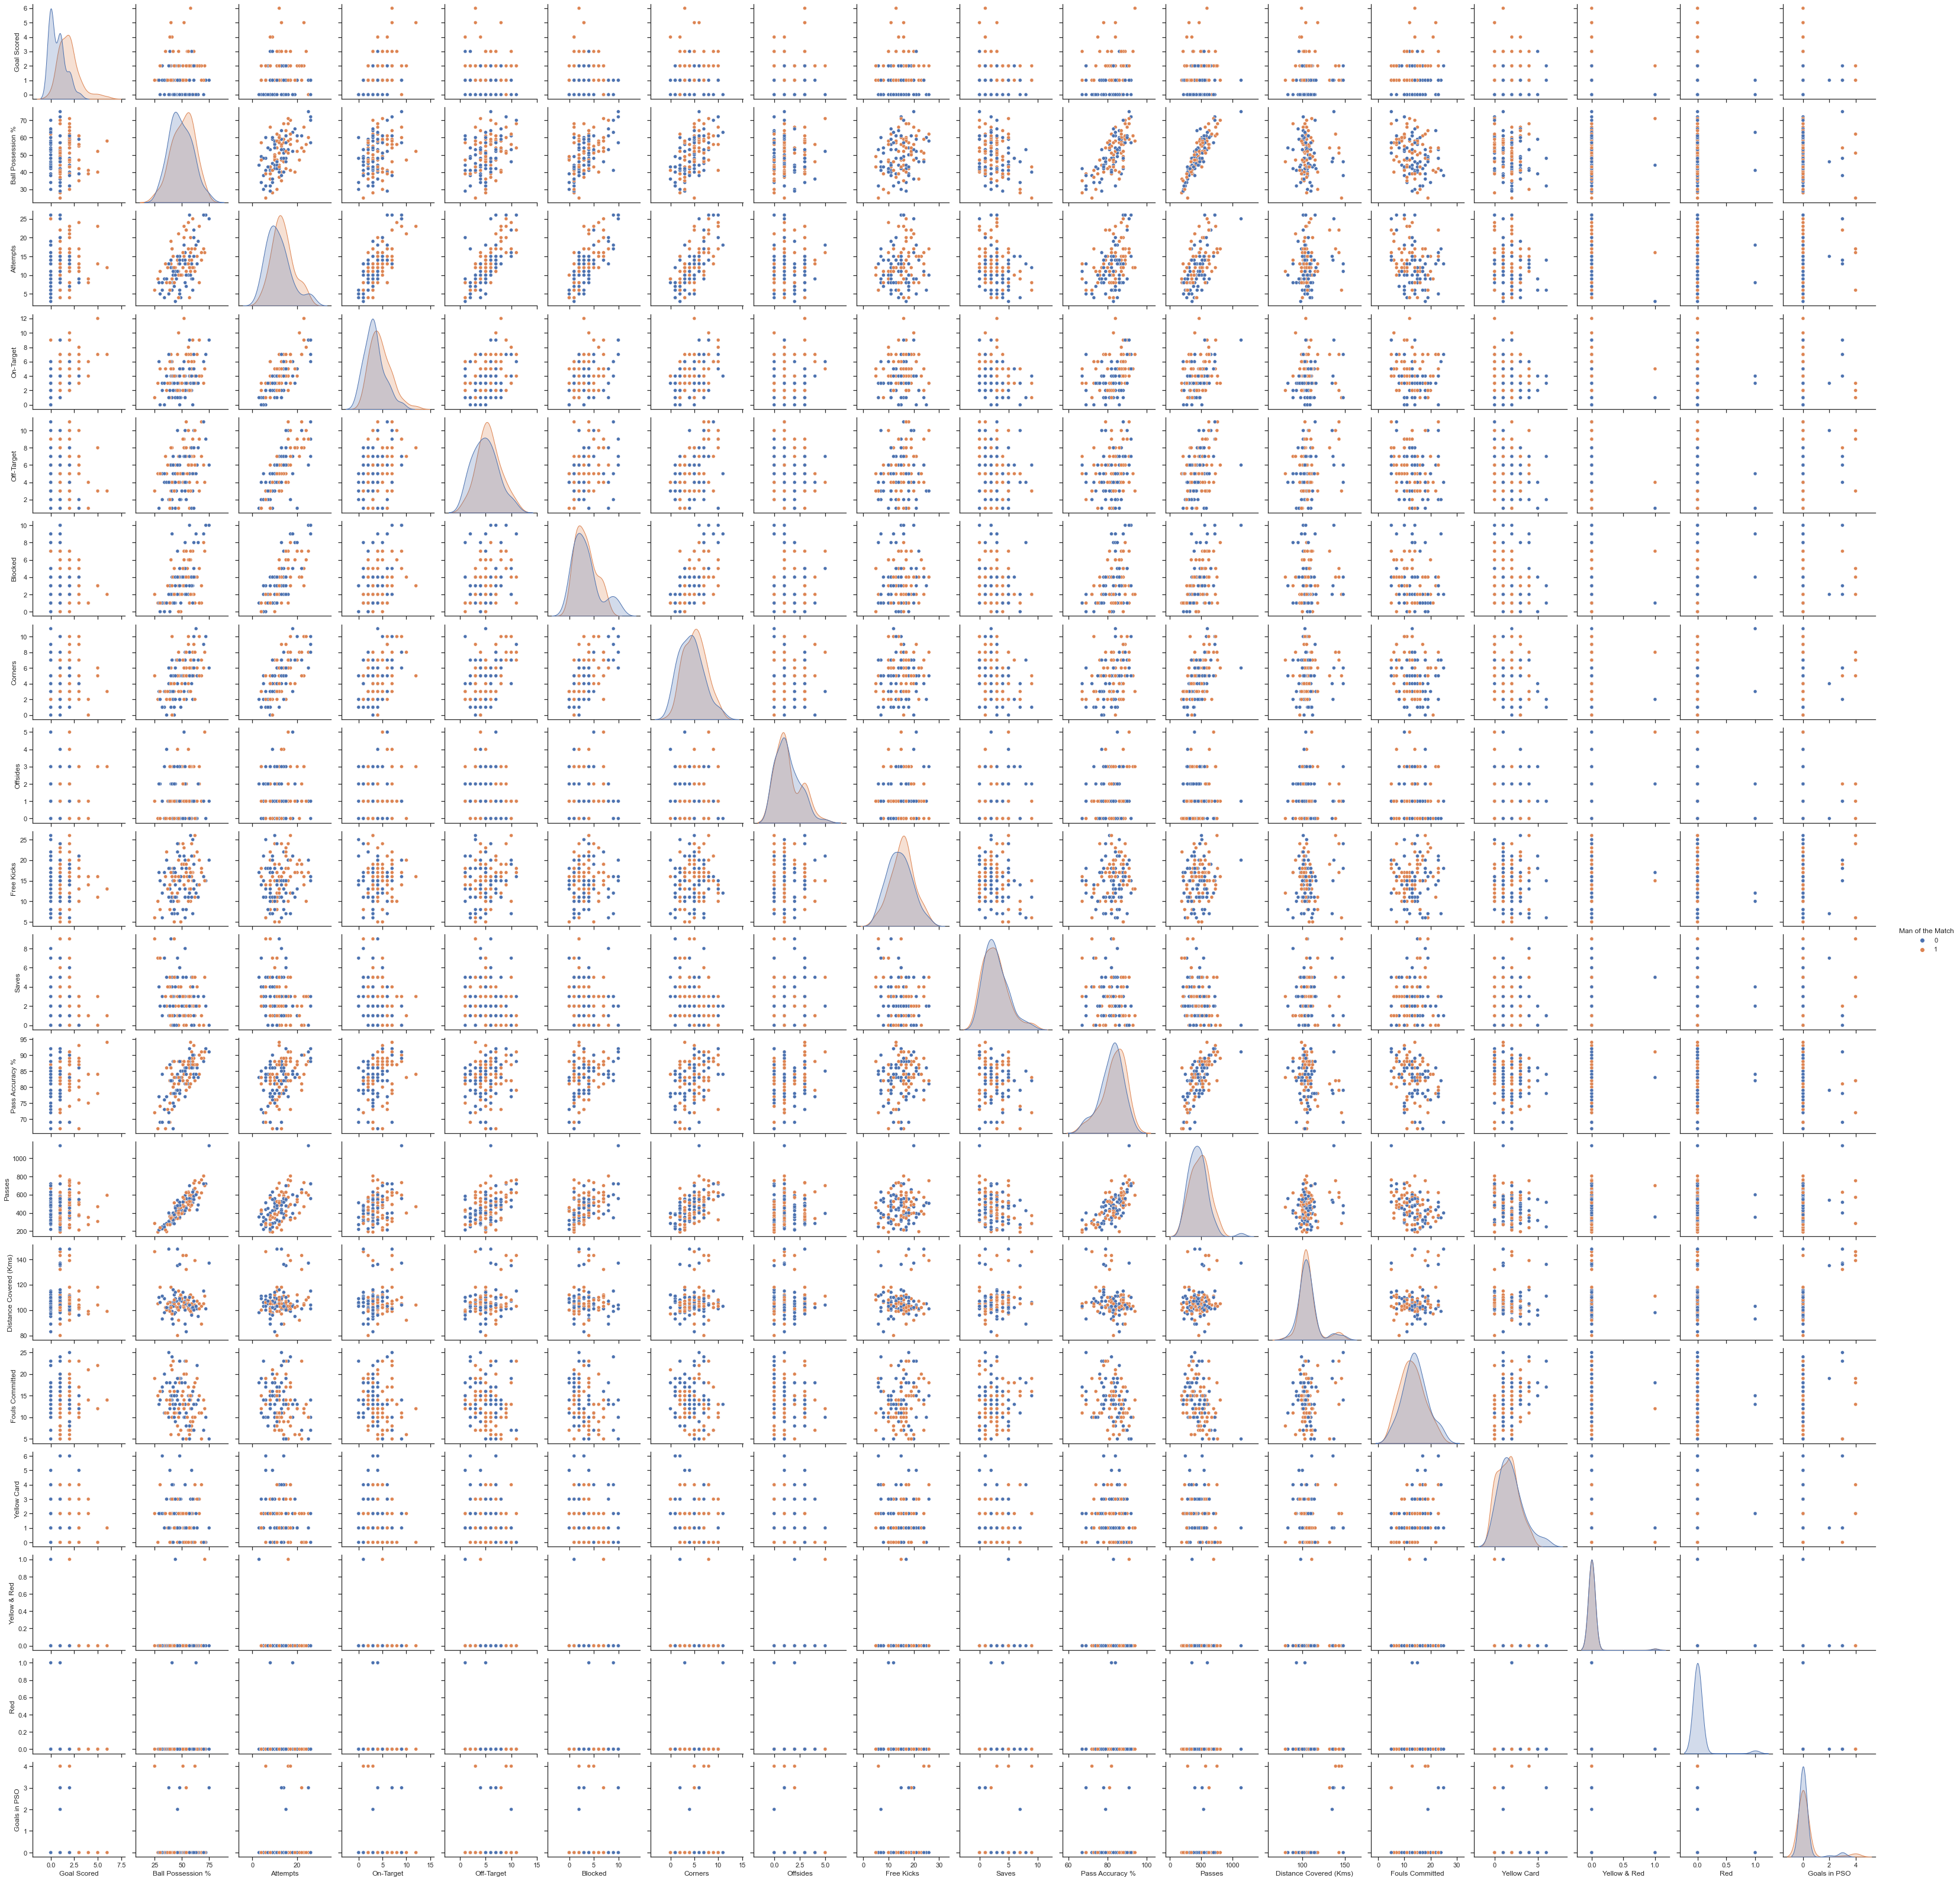

In [54]:
sns.pairplot(df, hue="Man of the Match")

## С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [56]:
X = int_df.drop('Man of the Match', axis=1)
Y = int_df['Man of the Match']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(96, 18), (32, 18)
(96,), (32,)


In [58]:
SVC1 = SVC()
SVC1.fit(X_train, Y_train)

SVC()

In [60]:
My_KNN_target_1_0 = SVC1.predict(X_train)
My_KNN_Y_Pred = SVC1.predict(X_test)
print(f'Accuracy:',     accuracy_score(Y_train,My_KNN_target_1_0), accuracy_score(Y_test,My_KNN_Y_Pred))
print(f'Precision:',    precision_score(Y_train,My_KNN_target_1_0), precision_score(Y_test,My_KNN_Y_Pred))
print(f'F1:',           f1_score(Y_train,My_KNN_target_1_0), f1_score(Y_test,My_KNN_Y_Pred))
print(f'Recall:',       recall_score(Y_train,My_KNN_target_1_0), recall_score(Y_test,My_KNN_Y_Pred))

Accuracy: 0.5520833333333334 0.5625
Precision: 0.5517241379310345 0.7
F1: 0.42666666666666664 0.5
Recall: 0.34782608695652173 0.3888888888888889


In [62]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [63]:
My_KNN_target_1_0 = GBC.predict(X_train)
My_KNN_Y_Pred = GBC.predict(X_test)
print(f'Accuracy:',     accuracy_score(Y_train,My_KNN_target_1_0),      accuracy_score(Y_test,My_KNN_Y_Pred))
print(f'Precision:',    precision_score(Y_train,My_KNN_target_1_0),     precision_score(Y_test,My_KNN_Y_Pred))
print(f'F1:',           f1_score(Y_train,My_KNN_target_1_0),            f1_score(Y_test,My_KNN_Y_Pred))
print(f'Recall:',       recall_score(Y_train,My_KNN_target_1_0),        recall_score(Y_test,My_KNN_Y_Pred))

Accuracy: 1.0 0.625
Precision: 1.0 0.6666666666666666
F1: 1.0 0.6666666666666666
Recall: 1.0 0.6666666666666666
